In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set the path
myModulePath = 'C:\\Users\\ricca\\.spyder-py3'
# 
if ( myModulePath not in sys.path ):
    sys.path.append( myModulePath )
#
from HarmSqrdRMS import HarmonicsRMS

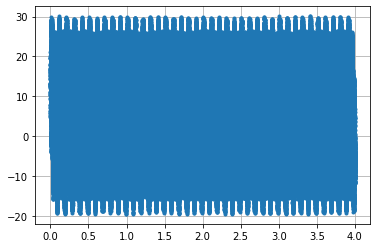

In [6]:
# example signal is a sum of sines and some random noise added
sigLen = 2e5
xx = np.arange(0, sigLen)
frq = 5e4
delT = 1/frq
timA = delT*xx
sin10Hz = 3*np.sin(2*np.pi * 10 * timA)
sin20Hz = 7.3*np.sin(2*np.pi * 20 * timA)
sin120Hz = 12.3*np.sin(2*np.pi * 120 * timA)
sin240Hz = 2.3*np.sin(2*np.pi * 240 * timA)
sin300Hz = 1.5*np.sin(2*np.pi * 300 * timA)
baseLinNoise = 2.8 + 5*np.random.random(int(sigLen))
#
signal = baseLinNoise + sin10Hz + sin20Hz + sin120Hz + sin240Hz + sin300Hz
#plot it fig1 = plt.figure(1)
plt.plot( timA, signal, '.:', label='Signal')
plt.grid()
# the signal RMS
rmsSignal = np.sqrt(sum((signal - np.mean(signal))**2)/sigLen)

Text(0, 0.5, 'Fourier Magnitude')

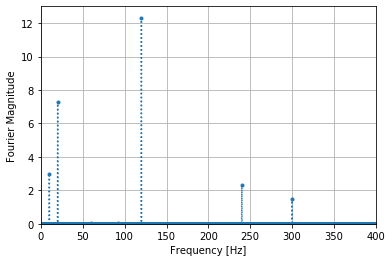

In [20]:
# plot the Fourier spectrum
sigFFT = np.fft.fft(signal - np.mean(signal))/sigLen
frqAx = 0.5*frq*np.arange(0, int(0.5*sigLen)+1)/(0.5*sigLen)
#
fig2 = plt.figure(2)
plt.plot( frqAx, 2*abs( sigFFT[0:int(0.5*sigLen)+1] ), '.:', label='power spectrum' )
#
plt.grid()
plt.axis([0, 400, 0, 13])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Fourier Magnitude')

In [10]:
# get the Harmonic RMS estimator
rmsHarmEstimate = HarmonicsRMS(signal, timA, 10.0, 40, 50e3, 2)
# get the RMS^2
sigRmsHarmonics = rmsHarmEstimate.distribRMS()


Text(0, 0.5, 'Harmonic RMS^2')

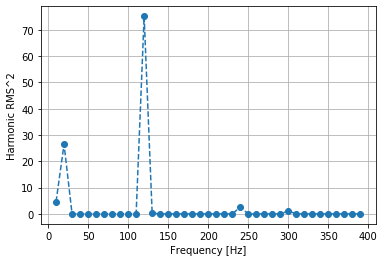

In [21]:
sigRmsHarmonics
# get an axis 
hrmAxis = 10*np.arange(1,40)
#
fig3 = plt.figure(3)
plt.plot(hrmAxis, sigRmsHarmonics, 'o--', label='Harmonics RMS^2')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Harmonic RMS^2')

In [16]:
# get the sum and SQRT it for the whole signal
rms10HzHarms = np.sqrt(sum(sigRmsHarmonics))
# compare with the time-base estimate
(rmsSignal - rms10HzHarms)/rmsSignal
# difference less than 1% - remember the random noise

0.009969860300953546